In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import cv2
import numpy as np
!pip install -U keras
!pip install tensorflow-gpu==2.1.0rc0

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
     |████████████████████████████████| 402.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 32.0MB/s 
     |████████████████████████████████| 450kB 49.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=df0ae99897bd63ba946611c94b30c81757d3ec4ffe12763de628f1f0bfbe65e1
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which

In [0]:
import math
import random
import keras
from keras.layers import *
from keras.models import Sequential
from keras import Model

Using TensorFlow backend.


In [0]:
PATH = "/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/4 Class ER"

# Train set patients: 230 232 242 263 
TrainX_1 = np.load(PATH + '/ER IHC 230 Images.npy')
TrainY_1 = np.load(PATH + '/ER IHC 230 Masks.npy')
TrainX_2 = np.load(PATH + '/ER IHC 232 Images.npy')
TrainY_2 = np.load(PATH + '/ER IHC 232 Masks.npy')
TrainX_3 = np.load(PATH + '/ER IHC 242 Images.npy')
TrainY_3 = np.load(PATH + '/ER IHC 242 Masks.npy')
TrainX_4 = np.load(PATH + '/ER IHC 263 Images.npy')
TrainY_4 = np.load(PATH + '/ER IHC 263 Masks.npy')

# Test set patients: 221 229 239 246 252
TestX_1 = np.load(PATH + '/ER IHC 221 Images.npy')
TestY_1 = np.load(PATH + '/ER IHC 221 Masks.npy')
TestX_2 = np.load(PATH + '/ER IHC 229 Images.npy')
TestY_2 = np.load(PATH + '/ER IHC 229 Masks.npy')
TestX_3 = np.load(PATH + '/ER IHC 239 Images.npy')
TestY_3 = np.load(PATH + '/ER IHC 239 Masks.npy')
TestX_4 = np.load(PATH + '/ER IHC 246 Images.npy')
TestY_4 = np.load(PATH + '/ER IHC 246 Masks.npy')
TestX_5 = np.load(PATH + '/ER IHC 252 Images.npy')
TestY_5 = np.load(PATH + '/ER IHC 252 Masks.npy')

In [0]:
def convertToLabels(data):
  data[data==85]=1
  data[data==170]=2
  data[data==255]=3

def convertFromLabels(data):
  data[data==1]=85
  data[data==2]=170
  data[data==3]=255

In [0]:
TrainX = np.concatenate((TrainX_1, TrainX_2, TrainX_3, TrainX_4), axis=0)
TrainGT = np.concatenate((TrainY_1, TrainY_2, TrainY_3, TrainY_4), axis=0)
TrainY = np.copy(TrainGT)
convertToLabels(TrainY)
TrainY = keras.utils.to_categorical(TrainY,num_classes=4,dtype='int16')

TestX = np.concatenate((TestX_1, TestX_2, TestX_3,TestX_4,TestX_5), axis=0)
TestGT = np.concatenate((TestY_1, TestY_2, TestY_3,TestY_4,TestY_5), axis=0)
TestY = np.copy(TestGT)
convertToLabels(TestY)
TestY = keras.utils.to_categorical(TestY,num_classes=4, dtype='int16')

ValidX = TrainX[1800:, : ]
ValidY = TrainY[1800:, : ]

TrainX = TrainX[0:1800, : ]
TrainY = TrainY[0:1800, : ]

In [0]:
TrainX = TrainX.astype('float32')/255
TestX = TestX.astype('float32')/255
ValidX = ValidX.astype('float32')/255

In [0]:
print(TrainX.shape)
print(TrainY.shape)

print(TestX.shape)
print(TestY.shape)

print(ValidX.shape)
print(ValidY.shape)

(1800, 240, 240, 3)
(1800, 240, 240, 4)
(2400, 240, 240, 3)
(2400, 240, 240, 4)
(120, 240, 240, 3)
(120, 240, 240, 4)


In [0]:
def get_conv_block1(input_layer,nFilters,size):
    conv1 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
    conv2 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    bn1 = BatchNormalization()(conv2)
    return bn1

def get_conv_block2(input_layer,nFilters,size):
    conv1 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input_layer)
    conv2 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv3 = Conv2D(nFilters, size, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    bn1 = BatchNormalization()(conv3)
    return bn1

def get_model():    
    input_layer = Input(shape=(240,240,3))
    block1 = get_conv_block1(input_layer,64,2)
    dr1 = Dropout(0.1)(block1)
    mp1 = MaxPooling2D(pool_size=(2, 2))(dr1)
    
    block2 = get_conv_block2(mp1,64,2)
    dr2 = Dropout(0.1)(block2)
    mp2 = MaxPooling2D(pool_size=(2, 2))(dr2)
    
    block3 = get_conv_block2(mp2,64,2)
    dr3 = Dropout(0.1)(block3)
    mp3 = MaxPooling2D(pool_size=(2, 2))(dr3)
    
    block4 = get_conv_block1(mp3,64,2)
    dr4 = Dropout(0.1)(block4)
    mp4 = MaxPooling2D(pool_size=(2, 2))(dr4)

    block5 = get_conv_block1(mp4,64,2)
    dr5 = Dropout(0.1)(block5)
       
    up1 = Conv2DTranspose(32,(2,2),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(dr5)
    cat1 = concatenate([block4,up1])
    dr1 = Dropout(0.1)(cat1)
    block5 = get_conv_block2(dr1,64,2)

    up2 = Conv2DTranspose(32,(2,2),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block5)
    cat2 = concatenate([block3,up2])
    dr2 = Dropout(0.1)(cat2)
    block6 = get_conv_block2(dr2,64,2)
    
    up3 = Conv2DTranspose(32,(2,2),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block6)
    cat3 = concatenate([block2,up3])
    dr3 = Dropout(0.1)(cat3)
    block7 = get_conv_block2(dr3,64,2)
    
    up4 = Conv2DTranspose(32,(3,3),strides =(2,2),activation='relu',padding='same',kernel_initializer = 'he_normal')(block7)
    cat4 = concatenate([block1,up4])
    dr4 = Dropout(0.1)(cat4)
    block8 = get_conv_block1(dr4,64,3)

    conv10 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(block8)
    conv11 = Conv2D(4,(1,1), activation='softmax', padding = 'same')(conv10)

    model = Model(input_layer,conv11)
    return model

In [0]:
model = get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 240, 64) 832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 240, 64) 16448       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 240, 240, 64) 256         conv2d_2[0][0]                   
____________________________________________________________________________________________

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('Checkpoint.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.001, decay=0.0, amsgrad=True)

In [0]:
def tversky_loss(y_true, y_pred):
    alpha = 0.5
    beta  = 0.5
    
    ones = K.ones(K.shape(y_true))
    p0 = y_pred      # proba that voxels are class i
    p1 = ones-y_pred # proba that voxels are not class i
    g0 = y_true
    g1 = ones-y_true
    
    num = K.sum(p0*g0, (0,1,2))
    den = num + alpha*K.sum(p0*g1,(0,1,2)) + beta*K.sum(p1*g0,(0,1,2))
    
    T = K.sum(num/den) # when summing over classes, T has dynamic range [0 Ncl]
    
    Ncl = K.cast(K.shape(y_true)[-1], 'float32')
    return Ncl-T

def combined_loss(y_true, y_pred):
  return (1*K.categorical_crossentropy(y_true, y_pred))+(0*tversky_loss(y_true, y_pred))

In [0]:
batch_size = 16
def get_batch(batch_size, X_train, Y_train): 
    size_batch = batch_size
    last_index = len(X_train) - 1
    x_train = X_train
    y_train = Y_train 
    while True:
        batch_data = [[],[]]
        for i in range(0, size_batch):
            random_index = random.randint(0, last_index)
            batch_data[0].append(x_train[random_index])
            batch_data[1].append(y_train[random_index])

        yield (np.array(batch_data[0]), np.array(batch_data[1]))     

In [0]:
from keras import backend as K      
model.compile(loss=combined_loss, optimizer= optimizer , metrics=[dice_coef,'accuracy'])

In [0]:
num_epoch = 100
datagen = get_batch(batch_size, TrainX, TrainY)
MODELS_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Models/4 Class/ER"
n_points = len(TrainX)
history = model.fit(datagen, 
                validation_data = (ValidX, ValidY),
                epochs=num_epoch,steps_per_epoch = math.ceil(n_points / batch_size), callbacks =[es,mc],  shuffle =True)
model.save(MODELS_PATH + '/HScoreNet_20_5_29_v2.h5')

Epoch 1/100
113/113 [==============================] - 144s 1s/step - loss: 0.4578 - dice_coef: 0.7497 - accuracy: 0.8768 - val_loss: 0.6010 - val_dice_coef: 0.7122 - val_accuracy: 0.6660

Epoch 00001: val_loss improved from inf to 0.60096, saving model to Checkpoint.h5
Epoch 2/100
113/113 [==============================] - 142s 1s/step - loss: 0.2567 - dice_coef: 0.8689 - accuracy: 0.8941 - val_loss: 0.5830 - val_dice_coef: 0.6990 - val_accuracy: 0.6660

Epoch 00002: val_loss improved from 0.60096 to 0.58305, saving model to Checkpoint.h5
Epoch 3/100
113/113 [==============================] - 142s 1s/step - loss: 0.2520 - dice_coef: 0.8725 - accuracy: 0.8850 - val_loss: 0.6533 - val_dice_coef: 0.6300 - val_accuracy: 0.6547

Epoch 00003: val_loss did not improve from 0.58305
Epoch 4/100
113/113 [==============================] - 142s 1s/step - loss: 0.2296 - dice_coef: 0.8834 - accuracy: 0.9153 - val_loss: 0.6282 - val_dice_coef: 0.6393 - val_accuracy: 0.7788

Epoch 00004: val_loss did

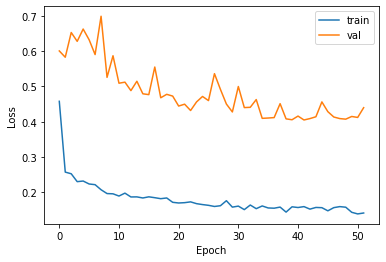

In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

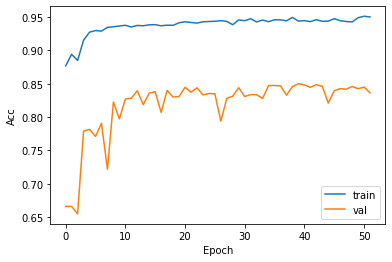

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
MODELS_PATH = "/content/drive/My Drive/Breast Cancer Treatment/Models/4 Class/ER/"
model = keras.models.load_model(MODELS_PATH +'/HScoreNet_20_5_29_v2.h5',custom_objects={ 'combined_loss': combined_loss, 'dice_coef': dice_coef })

In [0]:
trainResult = model.predict(TrainX, batch_size=8)
validResult = model.predict(ValidX,batch_size=8)
testResult = model.predict(TestX,batch_size=8)

In [0]:
trainResult = np.argmax(trainResult,axis=-1)
validResult = np.argmax(validResult,axis=-1)
testResult = np.argmax(testResult,axis=-1)

trainOneHot = keras.utils.to_categorical(trainResult,num_classes=4,dtype='int16')
validOneHot = keras.utils.to_categorical(validResult,num_classes=4,dtype='int16')
testOneHot = keras.utils.to_categorical(testResult,num_classes=4,dtype='int16')

convertFromLabels(trainResult)
convertFromLabels(validResult)
convertFromLabels(testResult)

print(trainResult.shape)
print(validResult.shape)
print(testResult.shape)

(1800, 240, 240)
(120, 240, 240)
(2400, 240, 240)


In [0]:
from sklearn import metrics
trial1 = np.reshape(TrainY,(-1, TrainY.shape[3]))
trial2 = np.reshape(trainOneHot,(-1, trainOneHot.shape[3]))

print("TRAIN")
print(metrics.classification_report(trial1.argmax(axis = 1), trial2.argmax(axis = 1)))
train_JC = metrics.jaccard_score(trial1.argmax(axis=1),trial2.argmax(axis=1),average='weighted')
print("JACCARD COEFFICIENT:  ",train_JC)

trial1 = np.reshape(TestY,(-1, TestY.shape[3]))
trial2 = np.reshape(testOneHot,(-1, testOneHot.shape[3]))

print("\n\nTEST")
print(metrics.classification_report(trial1.argmax(axis = 1), trial2.argmax(axis = 1)))
test_JC = metrics.jaccard_score(trial1.argmax(axis=1),trial2.argmax(axis=1),average='weighted')
print("JACCARD COEFFICIENT:  ",test_JC)

TRAIN


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98  91970674
           1       0.00      0.00      0.00   1284509
           2       0.52      0.67      0.59   4182920
           3       0.85      0.66      0.74   6241897

    accuracy                           0.94 103680000
   macro avg       0.59      0.58      0.58 103680000
weighted avg       0.94      0.94      0.94 103680000

JACCARD COEFFICIENT:   0.907942118745116


TEST
              precision    recall  f1-score   support

           0       0.99      0.99      0.99 131085645
           1       0.00      0.00      0.00    676269
           2       0.35      0.63      0.45   2009481
           3       0.77      0.67      0.72   4468605

    accuracy                           0.97 138240000
   macro avg       0.53      0.57      0.54 138240000
weighted avg       0.97      0.97      0.97 138240000

JACCARD COEFFICIENT:   0.949101276480573


In [0]:
def stitchMaskPatches(pieces):
  k = 0
  reconstructed_img = np.ones([1440,1920])
  for r in range(6):
    row = r * 240
    for c in range(8):
      col = c * 240
      reconstructed_img[row:row+240,col:col+240] = pieces[k]
      k = k + 1
  return reconstructed_img


def stitchImagePatches(pieces):
  k = 0
  reconstructed_img = np.ones([1440,1920,3])
  for r in range(6):
    row = r * 240
    for c in range(8):
      col = c * 240
      reconstructed_img[row:row+240,col:col+240,:] = pieces[k]
      k = k + 1
  return reconstructed_img

In [0]:
def saveNumpyOutput(mask, Patient_array,Patient_length,title):
  idx = 0
  for i in range(len(Patient_length)):
    temp = []
    for j in range(Patient_length[i]):
      print(j)
      final_output = mask[idx:idx+48]
      idx = idx + 48
      final_output = stitchMaskPatches(final_output)
      temp.append(final_output)
    final_output = np.asarray(temp)
    np.save("/content/drive/My Drive/Breast Cancer Treatment/Numpy Arrays/Predicted Output/ER/HScoreNet/" + title + Patient_array[i], final_output)

In [0]:
Train = ['230','232','242','263']
Train_len = [10,10,10,10]
Test  = ['221', '229', '239', '246','252']
Test_len = [10,10,10,10,10]

trainResult = np.append(trainResult,validResult,axis=0)
saveNumpyOutput(trainResult, Train, Train_len,"Train/")
saveNumpyOutput(testResult, Test, Test_len,"Test/")

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
